In [1]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

In [2]:
dataset = pd.read_csv('/Users/test/Desktop/news_cato/economic_times_data_2023-2.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})
ds = pd.read_csv('/Users/test/Desktop/news_cato/economic_times_data_2022.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})

In [3]:
dataset

,headline,category
0,"Manish Sisodias CBI custody ends, to be produc...",Liquor & Tobacco
1,Germany unveils immigration plan to tackle lab...,BFSI
2,"H-1B visa-holders spouses can work in US, says...",BFSI
3,Arvind Kejriwal asks Delhi LG to pay attention...,E-Commerce & IT
4,Govt open to investing more in the India Semic...,E-Commerce & IT
...,...,...
26395,Bigg Boss OTT Season 2 Finale: Tune in now for...,"OTT, Gaming & Digital Content"
26396,"Kygo at Gunnersbury Park: Date, duration, kick...",FMCG
26397,PM Narendra Modis I-Day Speech lays blueprint ...,FMCG
26398,PM Modi lays foundation for Sant Ravidas templ...,FMCG


In [4]:
ds

,headline,category
0,2nd-hand car dealers will be 'deemed' owners o...,Auto & Ancillary
1,Altigreen Pune Dealership: Altigreen opens new...,Auto & Ancillary
2,Automotive Aftermarket Suppliers Association: ...,Auto & Ancillary
3,Automobile dealers: Auto companies force unfai...,Auto & Ancillary
4,BYD dealership in Delhi: BYD opens new showroo...,Auto & Ancillary
...,...,...
26545,"Meta acquires 3D smart glass maker Luxexcel, T...",Communications
26546,Vodafone Idea rolls out new data add-on plans ...,Communications
26547,Google to pay Indiana $20 million to resolve p...,Communications
26548,India may review stance on Chinese investments...,Communications


In [5]:
dataset.category.value_counts()

Health & Wellness                5081
Auto & Ancillary                 3438
Communications                   3333
BFSI                             3299
E-Commerce & IT                  2562
FMCG                             2507
Retail                           1497
Handsets                         1212
OTT, Gaming & Digital Content    1084
Fashion & Lifestyle               453
Construction & Real Estate        436
Media & Entertainment             340
Liquor & Tobacco                  256
Consumer Electronics              254
E-health                          230
Internet based service            224
Ed-Tech                           194
Name: category, dtype: int64

In [6]:
ds.category.value_counts()

Health & Wellness                5216
Auto & Ancillary                 4121
BFSI                             4092
Communications                   3127
E-Commerce & IT                  2348
FMCG                             2174
Retail                           1698
OTT, Gaming & Digital Content     818
Handsets                          813
Media & Entertainment             341
Fashion & Lifestyle               331
Consumer Electronics              289
Construction & Real Estate        264
Liquor & Tobacco                  261
Internet based service            227
Ed-Tech                           219
E-health                          211
Name: category, dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

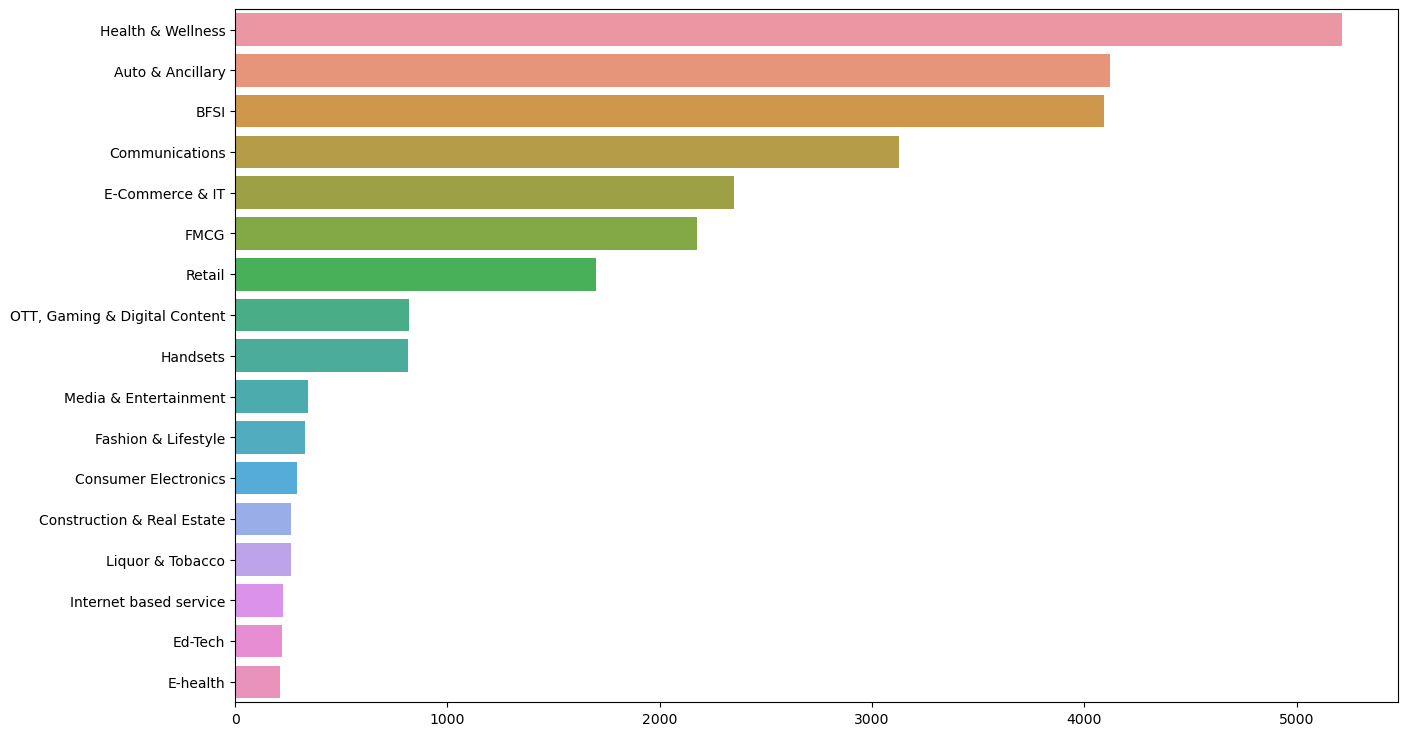

In [29]:
#training set
fig = plt.figure(figsize=(15,9))
sns.barplot(x = ds['category'].value_counts().values,y=ds['category'].value_counts().index)

In [9]:
# NLP Preprocess
def preprocess_text(text):
    try:

        if isinstance(text, str):
            return ' '.join(simple_preprocess(text))
        else:
            return ''
    except Exception as e:
        print(f"Error processing text: {e}")
        return ''

dataset.iloc[:, 0] = dataset.iloc[:, 0].apply(preprocess_text)
ds.iloc[:, 0] = ds.iloc[:, 0].apply(preprocess_text)

In [28]:
dataset

,headline,category
0,manish sisodias cbi custody ends to be produce...,Liquor & Tobacco
1,germany unveils immigration plan to tackle lab...,BFSI
2,visa holders spouses can work in us says judge,BFSI
3,arvind kejriwal asks delhi lg to pay attention...,E-Commerce & IT
4,govt open to investing more in the india semic...,E-Commerce & IT
...,...,...
26395,bigg boss ott season finale tune in now for th...,"OTT, Gaming & Digital Content"
26396,kygo at gunnersbury park date duration kick of...,FMCG
26397,pm narendra modis day speech lays blueprint fo...,FMCG
26398,pm modi lays foundation for sant ravidas templ...,FMCG


In [10]:

X_train = dataset['headline']
y_train = dataset['category']
X_test = ds['headline']
y_test = ds['category']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [16]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:

nb_classifier = MultinomialNB()

In [18]:

nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [19]:

y_pred = nb_classifier.predict(X_test_tfidf)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7813559322033898


In [21]:
print(classification_report(y_test, y_pred))

/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

             Auto & Ancillary       0.87      0.90      0.88      4121
                         BFSI       0.77      0.94      0.85      4092
               Communications       0.74      0.94      0.83      3127
   Construction & Real Estate       1.00      0.06      0.12       264
         Consumer Electronics       0.00      0.00      0.00       289
              E-Commerce & IT       0.76      0.84      0.80      2348
                     E-health       0.00      0.00      0.00       211
                      Ed-Tech       0.00      0.00      0.00       219
                         FMCG       0.57      0.50      0.54      2174
          Fashion & Lifestyle       0.97      0.10      0.18       331
                     Handsets       0.83      0.42      0.56       813
            Health & Wellness       0.81      0.95      0.87      5216
       Internet based service       0.00      0.00      0.00       227
     

/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import fasttext

In [24]:

pretrained_model_path = '/Users/test/Desktop/news_cato/cc.en.300.bin'  # Replace with the path to your pre-trained model
ft_model = fasttext.load_model(pretrained_model_path)

In [25]:

X_train_embeddings = [ft_model.get_sentence_vector(text) for text in X_train]
X_test_embeddings = [ft_model.get_sentence_vector(text) for text in X_test]

In [27]:

nb_classifier1 = MultinomialNB()
nb_classifier1.fit(X_train_embeddings, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:

y_pred = nb_classifier.predict(X_test_embeddings)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

In [ ]:

report = classification_report(y_test, y_pred)


print(report)